# Exploring-Opportunities-in-the-Indian-Startup-Ecosystem

# 1. Description
Our team aims to strategically enter the Indian Startup Ecosystem by leveraging data-driven insights to identify high-potential opportunities. Through comprehensive research and analysis, we seek to gain insight into funding received by startups in India from 2018 to 2021.

The project followed the Cross Industry Standard Process for Data Mining (CRISP-DM) framework methodology to solve the problem at hand.

# 2. Business Understanding
By [THE TIMES OF INDIA](https://timesofindia.indiatimes.com/business/india-business/india-becomes-third-largest-startup-ecosystem-in-the-world/articleshow/85871428.cms), India has emerged as the third largest startup ecosystem in the world after US and China. Following this, our team aims to strategically enter the Indian Startup Ecosystem by leveraging data-driven insights to identify high-potential opportunities. Through comprehensive research and analysis, we seek to gain insight into funding received by startups in India from 2018 to 2021.

### 2.1. Hypothesis
**Null Hypothesis (Ho):** The sector of a startup has no significant influence on the funding it receives.<br>

**Alternative Hypothesis (Ha):** The sector of a startup has significant influence on the funding it receives.

### 2.2.  Analytical Questions
1. How is funding spread across the years?
2. What are the dominant sectors within the Indian startup ecosystem across the years?
3. Are there any emerging sectors that have shown a significant increase in funding year over year?
4. Where in India could be considered the surviving grounds for startups?
5. How does the startup's location influence its funding and growth opportunities?
6. Is there a relationship between what a startup does and the funding it receives?
7. Is there a correlation between the year a startup received funding and the amount of funding it received?
8. Which cities or regions have the highest concentration of funded startups?

# 3.  Data Understanding
This data provides information into amount of money startups received from 2018 to 2021, the sector of startups, headquaters, what a startup do, the year of establishment, startup name, investors, and stage.<br>

`Feature Description`:
- **Company_Brand:** Name of startup
- **Founded:** Year of establishment
- **HeadQuater:** Location of startup Headquater
- **Sector:** Sector or industry of startup
- **What_it_does:** what the startup does
- **Founders:** Name od founder
- **Investors:** Name of investor
- **Amount:** Amount of investment in USD and INR
- **Statge:** Phase of development (eg. Ideation Stage, Pre-Seed Stage, Seed Stage, Early Stage (Series A, B, etc.))
- **Year:** Year startup received funding

### 3.1. Data Collection


### Import libraries

In [1]:
# Import necesary libraries and packages
import pyodbc
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import re
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

### Load Environment Variables and Create SQL Server Connection

In [2]:
# Load environment variables from .env file
environment_variables = dotenv_values('.env')
# Access login credentials from  the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("UID")
password = environment_variables.get("PWD")

In [3]:
#  Create Connection connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

# connect to the server using pyodbc
connection = pyodbc.connect(connection_string)

### Load Datasets 

In [4]:
# Write querry to retrieve tables from database
query1 = "Select * from dbo.LP1_startup_funding2020"
query2 = "Select * from dbo.LP1_startup_funding2021"

# Retrieve dataset from database with connection created
df_2020 = pd.read_sql(query1, connection)
df_2021 = pd.read_sql(query2, connection)

# Load CSV files
df_2018 = pd.read_csv('Data\startup_funding2018.csv')
df_2019 = pd.read_csv('Data\startup_funding2019.csv')

### 3.2. Data Exploration

### 3.3. Issues with the Data
- Duplicated rows
- Missing values
- Amount and Founded columns not in the right data types
- Inconsistent column names
- Some values not in their respective columns



#### 2020 Dataset Exploration and Preparation

In [5]:
# Preview dataframe
df_2020.head(3)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None


In [6]:
# Check characteristics of dataframe
print(df_2020.info(), "\n====================== Null Value Percentage ==========================")
# Check for null values
print(pd.DataFrame({"null_value_count": df_2020.isna().sum(), "percentage_null_value": df_2020.isna().mean().mul(100) }), "\n====================== Duplicated rows ======================")
# Check for duplicate
df_2020.loc[df_2020.duplicated()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.5+ KB
None 
====================== Null Value Percentage ==========================
               null_value_count  percentage_null_value
Company_Brand                 0               0.000000
Founded                     213              20.189573
HeadQuarter                  94               8.909953
Sector        

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
145,Krimanshi,2015.0,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed,None
205,Nykaa,2012.0,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,Falguni Nayar,"Alia Bhatt, Katrina Kaif",NaN,None,None
362,Byju’s,2011.0,Bangalore,EdTech,An Indian educational technology and online tu...,Byju Raveendran,"Owl Ventures, Tiger Global Management",500000000.0,None,None


Drop Duplicates

In [7]:
# Drop duplicated rows from DataFrame
df_2020.drop_duplicates(keep = "first", inplace = True)

Column10 has 99.8% null values so we drop it

In [8]:
# Drop columns10
df_2020.drop(columns = ["column10"], inplace = True)
# Preview remaining columns 
df_2020.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')

#### 2021 Dataset Exploration and Preparation

In [9]:
# Preview dataframe
df_2021.head(3)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D


In [10]:
# Check characteristics of dataframe
print(df_2021.info(), "\n====================== Null Value Percentage ======================")
# Check for null values
print(pd.DataFrame({"null_value_count": df_2021.isna().sum(), "percentage_null_value": df_2021.isna().mean().mul(100) }), "\n====================== Duplicated rows ======================")
# Check for duplicates
df_2021.loc[df_2021.duplicated()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB
None 
====================== Null Value Percentage ======================
               null_value_count  percentage_null_value
Company_Brand                 0               0.000000
Founded                       1               0.082713
HeadQuarter                   1               0.082713
Sector                        0               0.000000
What_it_

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
107,Curefoods,2020.0,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,None
109,Bewakoof,2012.0,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,None
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
117,Advantage Club,2014.0,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",$1700000,None
119,Ruptok,2020.0,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,$1000000,None
243,Trinkerr,2021.0,Bangalore,Capital Markets,Trinkerr is India's first social trading platf...,"Manvendra Singh, Gaurav Agarwal",Accel India,$6600000,Series A
244,Zorro,2021.0,Gurugram,Social network,Pseudonymous social network platform,"Jasveer Singh, Abhishek Asthana, Deepak Kumar","Vijay Shekhar Sharma, Ritesh Agarwal, Ankiti Bose",$32000000,Seed
245,Ultraviolette,2021.0,Bangalore,Automotive,Create and Inspire the future of sustainable u...,"Subramaniam Narayan, Niraj Rajmohan","TVS Motor, Zoho",$150000000,Series C
246,NephroPlus,2009.0,Hyderabad,Hospital & Health Care,A vision and passion of redefining healthcare ...,Vikram Vuppala,IIFL Asset Management,$24000000,Series E
247,Unremot,2020.0,Bangalore,Information Technology & Services,Unremot is a personal office for consultants!,Shiju Radhakrishnan,Inflection Point Ventures,$700000,Seed


Drop Duplicates

In [11]:
# Drop duplicated rows
df_2021.drop_duplicates(keep = "first", inplace = True)

#### 2018 Dataset Exploration and Preparation


In [12]:
# Preview dataframe
df_2018.head(3)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India


In [13]:
# Check characteristics of dataframe
print(df_2018.info(), "\n====================== Null Value Percentage ======================")
# Check for null values
print(pd.DataFrame({"null_value_count": df_2018.isna().sum(), "percentage_null_value": df_2018.isna().mean().mul(100) }), "\n====================== Duplicated rows ======================")
# Check for duplicates
df_2018.loc[df_2018.duplicated()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB
None 
====================== Null Value Percentage ======================
               null_value_count  percentage_null_value
Company Name                  0                    0.0
Industry                      0                    0.0
Round/Series                  0                    0.0
Amount                        0                    0.0
Location                      0                    0.0
About Company                 0                    0.0 
====================== Duplicated rows ============

,Company Name,Industry,Round/Series,Amount,Location,About Company
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."


Drop Duplicates

In [14]:
# Drop duplicated rows from DataFrame
df_2018.drop_duplicates(keep = "first", inplace = True)

#### 2019 Dataset Exploration and Preparation


In [15]:
# Preview dataframe
df_2019.head(3)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding


In [16]:
# Check characteristics of dataframe
print(df_2019.info(), "\n====================== Null Value Percentage ======================")
# Check for null values
print(pd.DataFrame({"null_value_count": df_2019.isna().sum(), "percentage_null_value": df_2019.isna().mean().mul(100) }), "\n====================== Duplicated rows ======================")
# Check for duplicate
df_2019.loc[df_2019.duplicated()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB
None 
====================== Null Value Percentage ======================
               null_value_count  percentage_null_value
Company/Brand                 0               0.000000
Founded                      29              32.584270
HeadQuarter                  19              21.348315
Sector                        5               5.617978
What it does 

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage


### 3.3. Handling Identified Issues
- Drop duplicates
- Add year of funding column to the individual dataset
- Filled missing values with percentage not more than 35%
    1. fill numerical columns with the median value of that column
    2. fill categorical columns with the most frequent values of that column
- Convert Amount and Founded columns to the right data types
- Rename columns to standardise them
- Put back data entries in their appropriate columns

### Add year_funded column to each dataset

In [17]:
# Add year column to dataframe
df_2020["Year_Funded"] = 2020
df_2021["Year_Funded"] = 2021
df_2019["Year_Funded"] = 2019
df_2018["Year_Funded"] = 2018

# Preview dataframe
df_2020.head(3)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year_Funded
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020


#### Establish uniformity in column names

In [18]:
# Rename columns
df_2019.rename(columns = {'Company/Brand':'Company_Brand','Amount($)':'Amount', 'What it does': 'What_it_does'}, inplace=True)

df_2018.rename(columns = {'Company Name':'Company_Brand','Industry':'Sector','Round/Series':'Stage','Location':'HeadQuarter','About Company':'What_it_does'}, inplace=True)

In [19]:
def rename_column(df):
    """
    This function takes in a dataframe and renames the column names to lower case
    """
    df.columns = [col_name.lower() for col_name in df.columns]
    return df

# Apply function to DataFrames
df_2018.pipe(rename_column)
df_2019.pipe(rename_column)
df_2020.pipe(rename_column)
df_2021.pipe(rename_column)

# Preview column names
df_2021.columns

Index(['company_brand', 'founded', 'headquarter', 'sector', 'what_it_does',
       'founders', 'investor', 'amount', 'stage', 'year_funded'],
      dtype='object')

### Verify if column name is standardised

In [20]:
# Compare if column names are uniform
print(df_2018.columns)
print(df_2019.columns)
print(df_2020.columns)
print(df_2021.columns)

Index(['company_brand', 'sector', 'stage', 'amount', 'headquarter',
       'what_it_does', 'year_funded'],
      dtype='object')
Index(['company_brand', 'founded', 'headquarter', 'sector', 'what_it_does',
       'founders', 'investor', 'amount', 'stage', 'year_funded'],
      dtype='object')
Index(['company_brand', 'founded', 'headquarter', 'sector', 'what_it_does',
       'founders', 'investor', 'amount', 'stage', 'year_funded'],
      dtype='object')
Index(['company_brand', 'founded', 'headquarter', 'sector', 'what_it_does',
       'founders', 'investor', 'amount', 'stage', 'year_funded'],
      dtype='object')


## Concatenate Datasets

In [21]:
# Combine all four datasets into a single dataframe
df_combined = pd.concat([df_2020, df_2021, df_2018, df_2019], axis = 0)
# Reset index to avoid duplication of index
df_combined.reset_index(drop = True, inplace = True)
# Preview combined dataframe
df_combined.head(3)

,company_brand,founded,headquarter,sector,what_it_does,founders,investor,amount,stage,year_funded
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020


In [22]:
# Check characteristics of dataframe
print(df_combined.info(), "\n====================== Null Value Count / Percentage ======================")
# Check for null values
print(pd.DataFrame({"null_value_count": df_combined.isna().sum(), "percentage_null_value": df_combined.isna().mean().mul(100) }), "\n====================== Duplicated rows ======================")
# Check for duplicated rows
df_combined.loc[df_combined.duplicated()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856 entries, 0 to 2855
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2856 non-null   object 
 1   founded        2088 non-null   float64
 2   headquarter    2742 non-null   object 
 3   sector         2838 non-null   object 
 4   what_it_does   2856 non-null   object 
 5   founders       2312 non-null   object 
 6   investor       2232 non-null   object 
 7   amount         2600 non-null   object 
 8   stage          1927 non-null   object 
 9   year_funded    2856 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 223.2+ KB
None 
====================== Null Value Count / Percentage ======================
               null_value_count  percentage_null_value
company_brand                 0               0.000000
founded                     768              26.890756
headquarter                 114               3.991597

,company_brand,founded,headquarter,sector,what_it_does,founders,investor,amount,stage,year_funded


# 4. Data Preparation


## Column Cleaning
### `Column: year_funded`

Change datatype of year_funded column from integer to datatime format

In [23]:
def year_to_datetime(column):
    """
    Converts year to datetime format
    """
    # Convert year to datetime format
    return pd.to_datetime(column, format = "%Y")

# Apply function to column
df_combined["year_funded"] = df_combined["year_funded"].apply(year_to_datetime)
# Confirm comverted datatype
df_combined.dtypes

company_brand            object
founded                 float64
headquarter              object
sector                   object
what_it_does             object
founders                 object
investor                 object
amount                   object
stage                    object
year_funded      datetime64[ns]
dtype: object

### `Column: amount`

In [24]:
# Preview unique entries in the amount column
df_combined["amount"].unique()[:40]

array([200000.0, 100000.0, nan, 400000.0, 340000.0, 600000.0, 45000000.0,
       1000000.0, 2000000.0, 1200000.0, 660000000.0, 120000.0, 7500000.0,
       5000000.0, 500000.0, 3000000.0, 10000000.0, 145000000.0,
       100000000.0, 21000000.0, 4000000.0, 20000000.0, 560000.0, 275000.0,
       4500000.0, 15000000.0, 390000000.0, 7000000.0, 5100000.0,
       700000000.0, 2300000.0, 700000.0, 19000000.0, 9000000.0,
       40000000.0, 750000.0, 1500000.0, 7800000.0, 50000000.0, 80000000.0],
      dtype=object)

Amount, Stage, and investor columns have some of their values interchanged and need to be cleaned

In [25]:
#Preview unique entries in the stage column
df_combined["stage"].unique()[30:-15]

array(['Pre series A1', 'Series E2', 'Pre series A', 'Seed Round',
       'Bridge Round', 'Pre seed round', 'Pre series B', 'Pre series C',
       'Seed Investment', 'Series D1', 'Mid series', 'Series C, D',
       'Seed funding', '$1200000', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series B3', 'PE', 'Series F1', 'Pre-series A1',
       '$300000', 'Early seed', '$6000000', '$1000000', 'Seies A',
       'Series A2', 'Series I', 'Angel', 'Private Equity',
       'Venture - Series Unknown'], dtype=object)

In [26]:
df_combined.loc[df_combined["stage"] == "$1200000"]

,company_brand,founded,headquarter,sector,what_it_does,founders,investor,amount,stage,year_funded
1150,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000,2021-01-01


In [27]:
# Put values in their appropriate columns
df_combined.at[1710, "amount"], df_combined.at[1710, "stage"] = 1000000, np.NAN
df_combined.at[1571, "amount"], df_combined.at[1571, "stage"] = 300000, np.NAN
df_combined.at[1584, "amount"], df_combined.at[1584, "stage"] = 300000, np.NAN
df_combined.at[1150, "amount"], df_combined.at[1150, "stage"] = 1200000, np.NAN
df_combined.at[1707, "amount"], df_combined.at[1707, "stage"] = 6000000, np.NAN
df_combined.at[1289, "amount"], df_combined.at[1289, "stage"], df_combined.at[1289, "investor"] = 22000000, "Series C", np.NAN
df_combined.at[1290, "amount"], df_combined.at[1290, "stage"], df_combined.at[1290, "investor"] = 5000000, "Seed", np.NAN
df_combined.at[2181, "amount"], df_combined.at[2181, "stage"], df_combined.at[2181, "investor"] = 1000000, "Seed", np.NAN
df_combined.at[1578, "amount"], df_combined.at[1578, "stage"], df_combined.at[1578, "investor"] = 1000000, "Pre-series A", np.NAN

Remove currency signs, convert INR (₹) to USD ($), and convert datatype to float

In [28]:
# Clean Amount colum and convert Indian Rupee to USD currency
def clean_amount(value):
    """ 
    Removes "$", and "₹"  and converts column to float
    """
    try:
        value = str(value)
        # Remove commas
        value = value.replace(",", "")
        # Check if the amount is in INR and convert to USD assuming 1 USD = 70 INR
        if "₹" in value:
            valuet = value.replace("₹", "")
            return round(float(value) / 70, 2)
        # Check if the amount is in USD
        elif "$" in value:
            value = value.replace("$", "")
            return round(float(value), 2) 
        # If no currency symbol, assume it's already in USD
        else:
            return round(float(value), 2)
    except ValueError:
        # For non-numeric entries, return NaN
        return np.NAN

# Apply the clean_amount function to the 'amount' column
df_combined["amount"] = df_combined["amount"].apply(clean_amount)

# Preview dataframe
df_combined["amount"].unique()[:35]

array([2.00e+05, 1.00e+05,      nan, 4.00e+05, 3.40e+05, 6.00e+05,
       4.50e+07, 1.00e+06, 2.00e+06, 1.20e+06, 6.60e+08, 1.20e+05,
       7.50e+06, 5.00e+06, 5.00e+05, 3.00e+06, 1.00e+07, 1.45e+08,
       1.00e+08, 2.10e+07, 4.00e+06, 2.00e+07, 5.60e+05, 2.75e+05,
       4.50e+06, 1.50e+07, 3.90e+08, 7.00e+06, 5.10e+06, 7.00e+08,
       2.30e+06, 7.00e+05, 1.90e+07, 9.00e+06, 4.00e+07])

### `Column: headquarter`

In [29]:
# Preview unique values in the headquarter column
df_combined["headquarter"].unique()[80:-50]

array(['Rajsamand', 'Ranchi', 'Faridabad, Haryana', 'Computer Games',
       'Vadodara', 'Food & Beverages', 'Pharmaceuticals\t#REF!',
       'Gurugram\t#REF!', 'Mohali', 'Powai', 'Ghaziabad', 'Nagpur',
       'West Bengal', 'Samsitpur', 'Lucknow', 'Telangana', 'Silvassa',
       'Thiruvananthapuram', 'Faridabad', 'Roorkee', 'Ambernath',
       'Panchkula', 'Surat', 'Mangalore', 'Telugana', 'Bhubaneswar',
       'Kottayam', 'Beijing', 'Panaji', 'Satara', 'Orissia', 'Santra',
       'Mountain View, CA', 'Trivandrum', 'Jharkhand', 'Bhilwara',
       'Guwahati', 'Online Media\t#REF!', 'London',
       'Information Technology & Services', 'The Nilgiris', 'Gandhinagar',
       'Bangalore, Karnataka, India', 'Mumbai, Maharashtra, India'],
      dtype=object)

headquarter, sector, and what it does columns have some of their values interchanged and needs to be cleaned

In [30]:
df_combined.loc[df_combined["headquarter"] == "Food & Beverages"]

,company_brand,founded,headquarter,sector,what_it_does,founders,investor,amount,stage,year_funded
1288,MasterChow,2020.0,Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,461000.0,Seed,2021-01-01


In [31]:
# Put values in their appropriate columns
df_combined.at[1288	, "headquarter"], df_combined.at[1288	, "sector"] = "Hauz Khas", "Food & Beverages"
df_combined.at[1289, "headquarter"], df_combined.at[1289, "sector"], df_combined.at[1289, "what_it_does"] = "None", "Pharmaceuticals", "None"
df_combined.at[1290, "what_it_does"] = df_combined.at[1290, "sector"]
df_combined.at[1290, "headquarter"], df_combined.at[1290, "sector"] = "Gurugram", "None"
df_combined.at[2133, "what_it_does"] = df_combined.at[2133, "sector"]
df_combined.at[2133, "headquarter"], df_combined.at[2133, "sector"] = "None", "Online Media"
df_combined.at[2209, "headquarter"], df_combined.at[2209, "sector"] = "Manchester, Greater Manchester", "Information Technology & Services"

Correct spelling mistakes in the headquarter column

In [32]:
def clean_column(value):
    """
    Corrects misspelled values, splits string at the comma, and takes the first string
    """
    replacement = {"New Delhi": "Delhi", "New New Delhi": "Delhi", "San Franciscao": "San Francisco", "San Francisco Bay Area": "San Francisco",
                   "Bangaldesh": "Bangladesh", "Milano": "Milan", "Newcastle Upon Tyne": "Newcastle", "Hyderebad": "Hyderabad", "Banglore": "Bengaluru",
                   "Bangalore": "Bengaluru", "Santra": "Santa", "Orissa": "Odisha", "Kormangala": "Koramangala", "Cochin": "Kochi", "Orissia": "Odisha",
                   "Thiruvananthapuram": "Trivandrum", "Samsitpur": "Samastipur", "Telugana": "Telangana", "Gurgaon": "Gurugram", "Rajastan": "Rajasthan",
                   "Uttar pradesh": "Uttar Pradesh", "Ahmadabad": "Ahmedabad"}
    
    value = str(value)
    # Condition ensures function processes non-None values
    if value is not None:
        for old_value, new_value in replacement.items():
            # Split comma separated values and extract the first value
            value = value.split(",")[0]
            # Replace mispelled values with corrected spelled values
            value = value.replace(old_value, new_value)
        return value

# Apply function to column
df_combined["headquarter"] = df_combined["headquarter"].apply(clean_column)

Check for entries containing only special characters

In [33]:
# Regular expression to match strings containing only special characters
special_chars = r'^[^\w\s]+$'

# Filter the DataFrame to include only entries with "what_it_does" containing only special characters
print(df_combined[df_combined["headquarter"].str.contains(special_chars, na=False)])

print("\nThere is no special character present in the column")

Empty DataFrame
Columns: [company_brand, founded, headquarter, sector, what_it_does, founders, investor, amount, stage, year_funded]
Index: []

There is no special character present in the column


Preview headquarter column

In [34]:
# Replace "nan" with np.NAN for it to be recognised as a null value
df_combined["headquarter"].replace("nan", np.NAN, inplace = True)
df_combined["headquarter"].replace("None", np.NAN, inplace = True)
# Preview column
df_combined["headquarter"].unique()[:20]

array(['Chennai', 'Bengaluru', 'Pune', 'Delhi', 'Indore', 'Hyderabad',
       'Gurugram', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli', 'Thane', nan, 'Singapore',
       'Gujarat', 'Haryana'], dtype=object)

Categorising headquarter based on location

In [35]:
def city_names(value):
    """
    Replaces sub cities with their major cities
    """
    cities = {"Bengaluru": ["Bengaluru City", "Koramangala"], "Delhi": ["Kalkaji", "Hauz Khas", "Azadpur"], "California": ["San Francisco", "Mountain View", "San Ramon", "Irvine"],
            "Tamil Nadu": ["Chennai", "Tirunelveli", "Guindy", "Mylapore", "Kalpakkam"], "Maharashtra": ["Andheri", "Thane", "Worli"],
            "Uttar Pradesh": ["Ghaziabad", "Uttar", "Lucknow", "Kanpur", "Noida"], "Rajasthan": ["Alwar", "Rajasthan"], "Mumbai": ["Powai", "Andheri"],
            "Kerala": ["Kochi", "Alleppey", "Kannur", "Ernakulam", "Trivandrum"], "Margão": ["Goa"], "Anand": ["Gujarat"], "Hyderabad": ["Telangana"],
            "Bihar": ["Samastipur", "Bihar"], "Rajasthan": ["Jodhpur"], "Gurgaon": ["Gurugram"]}
    
    # Put headquarter into categories
    for major_city, sub_city in cities.items():
        if value in sub_city:
            value = major_city
    return value

# Apply function to column
df_combined["headquarter"] = df_combined["headquarter"].apply(city_names)
# Preview column
df_combined["headquarter"].unique()

array(['Tamil Nadu', 'Bengaluru', 'Pune', 'Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Uttar Pradesh', 'Mumbai', 'Maharashtra',
       'Jaipur', 'Ahmedabad', 'Kolkata', nan, 'Singapore', 'Anand',
       'Haryana', 'Kerala', 'Rajasthan', 'Frisco', 'California',
       'Dhingsara', 'New York', 'Patna', 'Paris', 'Plano', 'Sydney',
       'Bangladesh', 'London', 'Milan', 'Palmwoods', 'France', 'Bihar',
       'Tumkur', 'Newcastle', 'Shanghai', 'Jiaxing', 'Ludhiana',
       'Dehradun', 'Tangerang', 'Berlin', 'Seattle', 'Riyadh', 'Seoul',
       'Bangkok', 'Chandigarh', 'Warangal', 'Odisha', 'Margão', 'Bhopal',
       'Coimbatore', 'Small Towns', 'Rajsamand', 'Ranchi', 'Faridabad',
       'Computer Games', 'Vadodara', 'Mohali', 'Nagpur', 'West Bengal',
       'Silvassa', 'Roorkee', 'Ambernath', 'Panchkula', 'Surat',
       'Mangalore', 'Bhubaneswar', 'Kottayam', 'Beijing', 'Panaji',
       'Satara', 'Santa', 'Jharkhand', 'Bhilwara', 'Guwahati',
       'Manchester', 'The Nilg

### `Column: stage`

In [36]:
df_combined["stage"].unique()

array([None, 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre-series C', 'Pre-series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding', nan, 'Seed+',
       'Series F2', 'Series A+', 'Series G', 'Series B3', 'PE',
       'Series F1', 'Pre-series A1', 'Early seed', 'Seies A', 'Series A2',
       'Series I', 'Angel', 'Private Equity', 'Venture - Series Unknown',
       'Grant', 'Debt Financing', 'Post-IPO Debt', 'Corporate Round',
       'Undisclosed',
      

Categorise Stages of funding according to the Indian Startup Ecosystem [Funding Guide](https://www.startupindia.gov.in/content/sih/en/funding.html) 

| Stages Classification | Description | Stages of funding per Data given |
|----------|-----------|-----------|
| Ideation | Brainstorming and developing business concepts, defining value propositions, and outlining plans | Pre-seed, Pre-Seed, Pre seed Round, Early seed, Pre-seed Round, Pre seed round |
| Validation | Validating the business model, product-market fit, and scalability through research and feedback | Angel, Seed, Seed A, Seed Funding, Seed round, Seed Round, Seed Round & Series A, Seed Investment, Angel Round, Seed fund, Seed funding, Seed+, Grant, Corporate Round |
| Early Traction | Gaining initial traction, attracting early adopters, and refining based on feedback | Series A, Series A-1, Series A+, Series A2, Seies A, Pre-Series A, Pre-series A, Pre series A1, Pre-series A1, Post series A, Pre Series A, Pre series A, Pre-series, Pre- series A, Venture - Series Unknown |
| Scaling | Expanding operations, customer base, and market reach for rapid growth | Series B, Series B2, Series B3, Series C, Series C, D, Series D, Series D1, Series E, Series F, Series F1, Series F2, Series G, Series H, Series I, Mid series, Pre-series B, Pre-Series B, Pre series B, Pre-series C, Pre series C, Bridge, Edge, Series B+, Post-IPO Equity, Debt, Debt Financing, Private Equity (PE), PE, Private Equity |
| Exit Options | Considering exit strategies such as mergers, acquisitions, or IPOs | Post-IPO Debt, Bridge Round |
| Others | Stages with unknown class | Fresh funding, Funding Round, Non-equity Assistance, Secondary Market, Undisclosed, https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593 |


Group stages according to the Indian Startup Ecosystem funding stage

In [37]:
def stage_classification(value):
    """
    Groups stages according to the Indian Startup Ecosystem funding stage
    """
    classification = {"Ideation": ["Pre-seed", "Pre-Seed", "Pre seed Round", "Early seed", "Pre-seed Round", "Pre seed round"],
                "Validation": ["Angel", "Seed", "Seed A", "Seed Funding", "Seed round", "Seed Round", "Seed Round & Series A", "Grant",
                "Seed Investment", "Angel Round", "Seed fund", "Seed funding", "Seed+",  "Corporate Round"],
                "Early Traction": ["Series A", "Series A-1", "Series A+", "Series A2", "Seies A", "Pre-Series A", "Pre-series A", "Pre- series A",
                "Venture - Series Unknown", "Pre series A1", "Pre-series A1", "Post series A", "Pre Series A", "Pre series A", "Pre-series"],
                "Scaling": ["Series B+", "Series B", "Series B2", "Series B3", "Series C", "Series C, D", "Series D", "Series D1", "Series E",
                "Series F", "Series E2", "Series F1", "Series F2", "Series G", "Series H", "Series I", "Mid series", "Bridge", "Edge", "Pre-series C",
                "Pre series C", "Pre-series B", "Pre-Series B", "Pre series B", "Private Equity (PE)", "PE", "Private Equity"],
                "Exit Options": ["Post-IPO Debt", "Post-IPO Equity", "Debt", "Debt Financing", "Bridge Round"],
                "Others": ["Fresh funding", "Funding Round", "Non-equity Assistance", "Secondary Market", "Undisclosed",
                           "https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593"]}
    
    # Put stages under class
    for classes, stage in classification.items():
        if value in stage:
            value = classes
    return value

# Apply function to column
df_combined["stage"] = df_combined["stage"].apply(stage_classification)
# Preview column
df_combined["stage"].unique()

array([None, 'Ideation', 'Validation', 'Early Traction', 'Scaling',
       'Exit Options', nan, 'Others'], dtype=object)

### `Column: sector`

In [38]:
# Preview unique entries in the column
df_combined["sector"].unique()[:30]

array(['AgriTech', 'EdTech', 'Hygiene management', 'Escrow',
       'Networking platform', 'FinTech', 'Crowdsourcing',
       'Food & Bevarages', 'HealthTech', 'Fashion startup',
       'Food Industry', 'Food Delivery', 'Virtual auditing startup',
       'E-commerce', 'Gaming', 'Work fulfillment', 'AI startup',
       'Telecommunication', 'Logistics', 'Tech Startup', 'Sports',
       'Retail', 'Medtech', 'Tyre management', 'Cloud company',
       'Software company', 'Venture capitalist', 'Renewable player',
       'IoT startup', 'SaaS startup'], dtype=object)

The sectors column has both single and list of categories separated by commas , indicating the multiple sectors a particular business might be involved in. <br>Extract the sector before the first comma.

In [39]:
# Regular expression to capture the first value separated by commas
regex = r"^([^,]+)"

# Function to extract first value if it exists, otherwise return the original single-entry value
def extract_first_word(value):
    # Convert NoneType value to string to avoid errors when iterating over values
    value = str(value)
    if "," in value:
        match = re.match(regex, value)
        if match:
            return match.group(1)
    return value

# Apply the function to the column
df_combined["sector"] = df_combined["sector"].apply(extract_first_word)

# Preview unique entries in the sector column
df_combined["sector"].unique()[:30]


array(['AgriTech', 'EdTech', 'Hygiene management', 'Escrow',
       'Networking platform', 'FinTech', 'Crowdsourcing',
       'Food & Bevarages', 'HealthTech', 'Fashion startup',
       'Food Industry', 'Food Delivery', 'Virtual auditing startup',
       'E-commerce', 'Gaming', 'Work fulfillment', 'AI startup',
       'Telecommunication', 'Logistics', 'Tech Startup', 'Sports',
       'Retail', 'Medtech', 'Tyre management', 'Cloud company',
       'Software company', 'Venture capitalist', 'Renewable player',
       'IoT startup', 'SaaS startup'], dtype=object)

In [40]:
# Function to categorize industries
def categorize_industry(industry):
    categories = {
        "Finance sector": r"(Accounting|FinTech|Finance|Venture capital|InsureTech|Investment|Financial Services|Banking|Lending|Insurance|Mutual Funds|Capital Markets|Wealth Management|Investment Banking|Online financial service|Escrow)",
        "Education & Training": r"(Provides online learning classes|EdTech|Education|E-learning|Learning|Teaching|Training|School|College|University|Tutoring|Coaching|Classes|Course|Degree|Skills|Edtech|Skill development|EdTech Startup|Education Management|Professional Training|Coaching|Training|Higher Education)",
        "Agriculture & Environment": r"(Fishery|Agri|Agriculture|Farm|Farming|AgTech|Food & Agriculture|Soil-Tech|Environmental|Environment|Sustainability|Sustainable|CleanTech|Green|Pollution|Waste|Recycling|Biomaterials|Environmental Services|Environmental Consulting|Agritech startup|Renewables & Environment|Environmental service|AgriTech)",
        "Health care": r"(Dental|Health|HealthTech|Medtech|Biotechnology|Pharmaceuticals|Healthcare|Dairy startup|Fertility tech|Fitness|Mental Health|Life sciences|Health Insurance|Pharma|Biopharma|Medical|Health care|Diabetes|Medical Device|Health Diagnostics|Hospital)",
        "Food & Beverage": r"(Food|Beverages|Restaurant|Dining|Nutrition|Snack Food|Cafe|Brewery|Bar|Craft Beer|Wine|Spirits|Beer|FoodTech|QSR|Restaurant|Food Production|Food & Beverages|Fusion beverages|Food Industry|Food Delivery|Dairy startup|Beverage)",
        "Retail & E-commerce": r"(Estore|E store|Retail|E-commerce|Marketplace|Online Portals|Retail Tech|E-tail|E-market|D2C|Direct-to-consumer|Shopping|Fashion|Clothing|Apparel|Jewellery|Beauty|Cosmetics|E-store|Furniture|Consumer goods|Consumer Electronics|Consumer|Eyewear|Ecommerce|Retail startup|Retail Aggregator|E-Commerce Platforms|D2C Business|D2C startup|E-marketplace|D2C jewellery|E-Commerce|Consumer Goods|Consumer software|Consumer appliances|Consumer Services)",
        "Energy & utility": r"(Energy|Utility|CleanTech|Renewable Energy|Solar|Wind|Hydro|GreenTech|Energy Storage|Oil|Gas|Renewable player|Energy & utility|Power|Fuel|Electricity|Energy|Energy Management|Energy Efficiency|Solar Monitoring Company|Solar solution)",
        "Logistics & Transportation": r"(Logistics|Transportation|Delivery|Shipping|Freight|Supply Chain|Warehousing|Distribution|Cargo|Trucking|Mobility|Fleet|Parcel|Courier|B2B Supply Chain|Transport|Transport Automation|Last Mile Transportation|Transportation|Mobility/Transport|Vehicle|Bike|Car|Automotive|Auto-tech|EV|Electric Vehicle|Logistics & Supply Chain)",
        "Real Estate & Construction": r"(Accomodation|Real Estate|Property|Housing|Construction|Building|Architecture|Infrastructure|Development|Home|Apartment|House|Commercial Real Estate|Residential|Rental|Co-working|Coworking|Co-living|Interior Design|Home Decor|Real estate|Interior|Construction tech|Real Estate & Construction|Property Management|Housing Marketplace|Real Estate)",
        "Media & Entertainment": r"(FM|Blogging|Online storytelling|Basketball|Games|Online Games|Mobile Games|Media|Entertainment|Content|Music|Video|Streaming|TV|Film|Podcast|Broadcasting|Publishing|News|Digital Media|Social Media|Advertising|Marketing|Gaming|Sports|Events|SportsTech|Media and Entertainment|Digital Entertainment|Visual Media|Online Media|Content creation|Content publishing|Celebrity Engagement)",
        "Consumer Services": r"(Legal|Cooking|Advisory firm|Merchandise|Consumer Services|Service|Hospitality|Hotel|Travel|Tourism|Leisure|Customer|Customer service|Professional Services|Consulting|Home services|Lifestyle|Personal care|Dating|Beauty & wellness|Wellness|Healthcare|Eyeglasses|Consumer Services|Pet care|Veterinary|Personal Care|Tourism|Hotel|Events|Service industry|Recruitment|Staffing|HR Tech startup|HR Tech|Job portal|Job discovery platform)",
        "Industrial & Manufacturing": r"(Aero company|Aeorspace|Automobile|Aviation|Battery|Tyre management|Industrial|Manufacturing|Engineering|Automotive|Machinery|Equipment|Robotics|Industrial Automation|Aerospace|Defense|Construction|Mining|Chemical|Material|Metallurgy|Heavy Industry|Factory|Production|Assembly|Textiles|Construction tech|Manufacturing|Manufacturing startup|Automotive company|Automobile Technology|Industrial Automation|Mechanical Or Industrial Engineering|Mechanical & Industrial Engineering)",
        "Communication & Networking": r"(Communication|Networking|Telecommunication|Network|Platform|Social Network|Messaging|Collaboration|Media & Networking|Network Security|Telecommuncation|Networking platform|Telecommunications|Networking)",
         "Technology sector": r"(Internet|OTT|Data Analytics|Data Intelligence|Android|3D Printing|B2B|Crypto|Data Science|IT|Scanning app|IT company|Tech|AI|IoT|SaaS|Software|Cloud|AR|VR|Blockchain|Automation|Robotics|Cybersecurity|Big Data|Machine Learning|Developer Tools|Information Technology|Computer)"
    }
    
    for category, pattern in categories.items():
        if re.search(pattern, industry, re.IGNORECASE):
            return category
    return industry

# Apply function to the column
df_combined["sector"] = df_combined["sector"].apply(categorize_industry)
# Preview unique entries in the column
df_combined["sector"].unique()


array(['Agriculture & Environment', 'Education & Training',
       'Hygiene management', 'Finance sector',
       'Communication & Networking', 'Crowdsourcing', 'Food & Beverage',
       'Health care', 'Retail & E-commerce', 'Technology sector',
       'Media & Entertainment', 'Work fulfillment',
       'Logistics & Transportation', 'Industrial & Manufacturing',
       'Energy & utility', 'Real Estate & Construction',
       'Consumer Services', 'Multinational conglomerate company',
       'Publication', 'Entreprenurship', 'WL & RAC protection',
       'Social commerce', 'Social Commerce', 'HR', 'None', 'Appliance',
       'Location Analytics', 'Hygiene', 'E-connect', 'Consultancy',
       'Deisgning', 'Taxation', 'Electronics', 'Tobacco', 'Drone',
       'Wholesale', 'Water purification', 'Innovation Management',
       'Social audio', 'Human Resources', 'CRM', 'Innovation management',
       'Advertisement', 'Cultural', 'Matrimony', 'Analytics', 'Commerce',
       'NFT', 'Translation

Check for entries containing only special characters

In [41]:
# Regular expression to match strings containing only special characters
special_chars = r'^[^\w\s]+$'

# Filter the DataFrame to include only entries with "what_it_does" containing only special characters
df_combined[df_combined["sector"].str.contains(special_chars, na=False)].head(3)

,company_brand,founded,headquarter,sector,what_it_does,founders,investor,amount,stage,year_funded
2300,MissMalini Entertainment,NaN,Mumbai,—,MissMalini Entertainment is a multi-platform n...,NaN,NaN,NaN,Validation,2018-01-01
2347,Jagaran Microfin,NaN,Kolkata,—,Jagaran Microfin is a Microfinance institution...,NaN,NaN,NaN,Exit Options,2018-01-01
2363,FLEECA,NaN,Jaipur,—,FLEECA is a Tyre Care Provider company.,NaN,NaN,NaN,Validation,2018-01-01


Replace special characters with null values

In [42]:
# Replace special characters with null values
df_combined["sector"] = df_combined["sector"].replace("—", np.NAN)
df_combined["sector"] = df_combined["sector"].replace("nan", np.NAN)


### `Column: founded`

In [43]:
df_combined["founded"].unique()

array([2019., 2018., 2020., 2016., 2008., 2015., 2017., 2014., 1998.,
       2007., 2011., 1982., 2013., 2009., 2012., 1995., 2010., 2006.,
       1978.,   nan, 1999., 1994., 2005., 1973., 2002., 2004., 2001.,
       2021., 1993., 1989., 2000., 2003., 1991., 1984., 1963.])

In [44]:
# Check for data type
df_combined["founded"].dtype

dtype('float64')

Data type is float and needs to be converted to integer and when you apply a function that converts values in a column to integers but also assigns np.nan to invalid entries, the resulting column will be of type float64. This is because np.nan is a floating-point representation of "Not a Number" (NaN), and a column in a pandas DataFrame that includes np.nan values will be cast to a floating-point type to accommodate these NaN values.<br>

**NB**: As a result, we assign 0 to invalid entries for now.

In [45]:
def convert_to_integer(value):
    try:
        # convert the value to an integer
        return int(value)
    except ValueError:
        return 0
    
# Apply function to coulmn
df_combined["founded"] = df_combined["founded"].apply(convert_to_integer)
# Confirm datadtype
df_combined["founded"].dtype

dtype('int64')

### `Column: investor`

In [46]:
# View unique entries in the column
df_combined["investor"].unique()

array(['Angel investors', 'GSF Accelerator', 'Venture Center', ...,
       'MyPreferred Transformation, Avendus Finance, SoftBank',
       'Norwest Venture Partners, General Catalyst, Fundamentum, Accel Partners',
       'TPG, Norwest Venture Partners, Evolvence India'], dtype=object)

Check for entries containing only special characters

In [47]:
# Regular expression to match strings containing only special characters
special_chars = r'^[^\w\s]+$'

# Filter the DataFrame to include only entries with "what_it_does" containing only special characters
print(df_combined[df_combined["investor"].str.contains(special_chars, na=False)])

print("\n'investor' column has no special character present")

Empty DataFrame
Columns: [company_brand, founded, headquarter, sector, what_it_does, founders, investor, amount, stage, year_funded]
Index: []

'investor' column has no special character present


In [48]:
df_combined[df_combined["investor"] == "http://100x.vc/"]

,company_brand,founded,headquarter,sector,what_it_does,founders,investor,amount,stage,year_funded
1111,Karnival,2015,Bengaluru,Technology sector,A SAAS platform for retailers and brands to cr...,Neeraj Tyagi,http://100x.vc/,2500000.0,Validation,2021-01-01


We need to replace the hyperlink with a null value

In [49]:
# Replace hyperlink with null value
df_combined["investor"].replace("http://100x.vc/", np.NAN, inplace = True)

### `Column: what_it_does`

In [50]:
df_combined["what_it_does"].unique()

array(['Cultivating Ideas for Profit',
       'An academy-guardian-scholar centric ecosystem which provides state of the art technological solutions.',
       'Converting bio-hazardous waste to harmless waste', ...,
       'Provides rooms for comfortable stay', 'Online car retailer',
       'Organised Non-Banking Finance Company'], dtype=object)

Check for entries containing only special characters

In [51]:
# Regular expression to match strings containing only special characters
special_chars = r'^[^\w\s]+$'

# Filter the DataFrame to include only entries with "what_it_does" containing only special characters
print(df_combined[df_combined["what_it_does"].str.contains(special_chars, na=False)])
print("\nThere is no special character present in the column")

Empty DataFrame
Columns: [company_brand, founded, headquarter, sector, what_it_does, founders, investor, amount, stage, year_funded]
Index: []

There is no special character present in the column


We need to replace special characters with Null values

## Fill Null values

#### `Columns: amount, founded`

We are going to fill null values in the column. This will be done according to the year startups received funding due to the difference in data characteristics of each dataset.
- We filter the datasets by year funded and fill them accordingly.
- We fill null values with the median value of each year.<br>

**NB**: Mean is affected by outliers and as a result, we use median.

Because fillna method does not work in-place on a subset of the DataFrame returned by a condition. Instead, we will handle the operation in a step-by-step manner using a function;
- First selecting the rows you want to modify
- Applying the fillna
- Updating the original DataFrame

In [52]:
# Check the number of null values in each dataset under the amount column
print(f'There are {df_combined[df_combined["year_funded"] == "2018"]["amount"].isna().sum()} null value(s) in the 2018 dataset under the amount column')
print(f'There are {df_combined[df_combined["year_funded"] == "2019"]["amount"].isna().sum()} null value(s) in the 2019 dataset under the amount column')
print(f'There are {df_combined[df_combined["year_funded"] == "2020"]["amount"].isna().sum()} null value(s) in the 2020 dataset under the amount column')
print(f'There are {df_combined[df_combined["year_funded"] == "2021"]["amount"].isna().sum()} null value(s) in the 2022 dataset under the amount column')

There are 292 null value(s) in the 2018 dataset under the amount column
There are 12 null value(s) in the 2019 dataset under the amount column
There are 253 null value(s) in the 2020 dataset under the amount column
There are 141 null value(s) in the 2022 dataset under the amount column


We are going to fill the null values in the amount column and reaplace (0)s in the founded column with the median  of each dataset now

In [53]:
def fillna_with_median(df, condition_column, condition_value, target_column):
    """
    Fills NaN values in the target column with the median of that column,
    and returns the updated DataFrame with NaN values filled.
    """
    # Select rows that match the condition
    subset_df = df[df[condition_column] == condition_value]
    # Compute the median of the target column for these rows
    median_value = subset_df[target_column].median()
    # Fill NaN values in the target column with the median value
    subset_df[target_column].fillna(median_value, inplace=True)
    # Replace (0) with "unknown"
    subset_df[target_column].replace(0, median_value, inplace = True)
    # Update the original DataFrame with the modified subset
    df.update(subset_df)
    return df

# Apply function to fill null values
fillna_with_median(df_combined, "year_funded", "2018", "amount")
fillna_with_median(df_combined, "year_funded", "2019", "amount")
fillna_with_median(df_combined, "year_funded", "2020", "amount")
fillna_with_median(df_combined, "year_funded", "2021", "amount")

# Apply function to replace (0)s with median
fillna_with_median(df_combined, "year_funded", "2019", "founded")
fillna_with_median(df_combined, "year_funded", "2020", "founded")
fillna_with_median(df_combined, "year_funded", "2021", "founded")

# Check if null values are filled
null_value_count_amount = df_combined["amount"].isna().sum()
null_value_count_founded = df_combined["founded"].isna().sum()


print(f'There are {null_value_count_amount} null value(s) present in the amount column')
print(f'There are {null_value_count_founded} (0)s present in the founded column')

There are 0 null value(s) present in the amount column
There are 0 (0)s present in the founded column


#### `Column: headquarter`
Preview null value counts in each dataset

In [54]:
# Check the number of null values in each dataset under the headquarter column
print(f'There are {df_combined[df_combined["year_funded"] == "2018"]["headquarter"].isna().sum()} null value(s) in the 2018 dataset under the headquarter column')
print(f'There are {df_combined[df_combined["year_funded"] == "2019"]["headquarter"].isna().sum()} null value(s) in the 2019 dataset under the headquarter column')
print(f'There are {df_combined[df_combined["year_funded"] == "2020"]["headquarter"].isna().sum()} null value(s) in the 2020 dataset under the headquarter column')
print(f'There are {df_combined[df_combined["year_funded"] == "2021"]["headquarter"].isna().sum()} null value(s) in the 2021 dataset under the headquarter column')

There are 0 null value(s) in the 2018 dataset under the headquarter column
There are 19 null value(s) in the 2019 dataset under the headquarter column
There are 94 null value(s) in the 2020 dataset under the headquarter column
There are 3 null value(s) in the 2021 dataset under the headquarter column


We are going to fill the null values in the headquarter column with the most frequent value (mode) according to the year

In [55]:
def fillna_with_mode(df, condition_column, condition_value, target_column):
    """
    Fills NaN values in the target column with the modal value of that column,
    and returns the updated DataFrame with NaN values filled.
    """
    # Select rows that match the condition
    sub_set = df[df[condition_column] == condition_value]
    # Compute the median of the target column for these rows
    mode = sub_set[target_column].mode()[0]
    # Fill NaN values in the target column with the modal value
    sub_set[target_column].fillna(mode, inplace = True)
    # Update the original DataFrame with the modified subset
    df.update(sub_set)
    return df

# Apply function to fill null values
fillna_with_mode(df_combined, "year_funded", "2019", "headquarter")
fillna_with_mode(df_combined, "year_funded", "2020", "headquarter")
fillna_with_mode(df_combined, "year_funded", "2021", "headquarter")

# Check if null values are filled
null_value_count = df_combined["headquarter"].isna().sum()
print(f'There are {null_value_count} null value(s) present in the headquarter column')

There are 0 null value(s) present in the headquarter column


#### `Column: sector`
Preview null value counts in each dataset

In [56]:
# Check the number of null values in each dataset under the sector column
print(f'There are {df_combined[df_combined["year_funded"] == "2018"]["sector"].isna().sum()} null value(s) in the 2018 dataset under the sector column')
print(f'There are {df_combined[df_combined["year_funded"] == "2019"]["sector"].isna().sum()} null value(s) in the 2019 dataset under the sector column')
print(f'There are {df_combined[df_combined["year_funded"] == "2020"]["sector"].isna().sum()} null value(s) in the 2020 dataset under the sector column')
print(f'There are {df_combined[df_combined["year_funded"] == "2021"]["sector"].isna().sum()} null value(s) in the 2021 dataset under the sector column')

There are 30 null value(s) in the 2018 dataset under the sector column
There are 5 null value(s) in the 2019 dataset under the sector column
There are 0 null value(s) in the 2020 dataset under the sector column
There are 0 null value(s) in the 2021 dataset under the sector column


We are going to fill the null values in the stage column with the most frequent value (mode) according to the year

In [57]:
# Apply function to fill null values
fillna_with_mode(df_combined, "year_funded", "2018", "sector")
fillna_with_mode(df_combined, "year_funded", "2019", "sector")

# Check if null values are filled
null_value_count = df_combined["sector"].isna().sum()
print(f'There are {null_value_count} null value(s) present in the sector column')

There are 0 null value(s) present in the sector column


#### `Column: stage`
Preview null value counts in each dataset

In [58]:
# Check the number of null values in each dataset under the stage column
print(f'There are {df_combined[df_combined["year_funded"] == "2018"]["stage"].isna().sum()} null value(s) in the 2018 dataset under the stage column')
print(f'There are {df_combined[df_combined["year_funded"] == "2019"]["stage"].isna().sum()} null value(s) in the 2019 dataset under the stage column')
print(f'There are {df_combined[df_combined["year_funded"] == "2020"]["stage"].isna().sum()} null value(s) in the 2020 dataset under the stage column')
print(f'There are {df_combined[df_combined["year_funded"] == "2021"]["stage"].isna().sum()} null value(s) in the 2021 dataset under the stage column')

There are 0 null value(s) in the 2018 dataset under the stage column
There are 46 null value(s) in the 2019 dataset under the stage column
There are 462 null value(s) in the 2020 dataset under the stage column
There are 422 null value(s) in the 2021 dataset under the stage column


We are going to fill the null values in the sector column with the most frequent value (mode) according to the year

In [59]:
# Apply function to fill null values
fillna_with_mode(df_combined, "year_funded", "2019", "stage")
fillna_with_mode(df_combined, "year_funded", "2020", "stage")
fillna_with_mode(df_combined, "year_funded", "2021", "stage")

# Check if null values are filled
null_value_count = df_combined["stage"].isna().sum()
print(f'There are {null_value_count} null value(s) present in the stage column')

There are 0 null value(s) present in the stage column


#### `Columns: founders, investor`
We won't fill these columns in the 2018 dataset with the modal value because it didn't have these columns. They would rather be filled with **unknown**<br>

Preview null values in each dataset

In [60]:
# Check the number of null values in each dataset under the founders column
print(f'There are {df_combined[df_combined["year_funded"] == "2019"]["founders"].isna().sum()} null value(s) in the 2019 dataset under the founders column')
print(f'There are {df_combined[df_combined["year_funded"] == "2020"]["founders"].isna().sum()} null value(s) in the 2020 dataset under the founders column')
print(f'There are {df_combined[df_combined["year_funded"] == "2021"]["founders"].isna().sum()} null value(s) in the 2021 dataset under the founders column')

# Check the number of null values in each dataset under the investor column
print(f'\nThere are {df_combined[df_combined["year_funded"] == "2019"]["investor"].isna().sum()} null value(s) in the 2019 dataset under the investor column')
print(f'There are {df_combined[df_combined["year_funded"] == "2020"]["investor"].isna().sum()} null value(s) in the 2020 dataset under the investor column')
print(f'There are {df_combined[df_combined["year_funded"] == "2021"]["investor"].isna().sum()} null value(s) in the 2021 dataset under the investor column')

There are 3 null value(s) in the 2019 dataset under the founders column
There are 12 null value(s) in the 2020 dataset under the founders column
There are 4 null value(s) in the 2021 dataset under the founders column

There are 0 null value(s) in the 2019 dataset under the investor column
There are 38 null value(s) in the 2020 dataset under the investor column
There are 66 null value(s) in the 2021 dataset under the investor column


We are going to fill the null values in the founders and investor columns with the most frequent value (mode) according to the year

In [61]:
# Apply function to fill null values in the founders column 
fillna_with_mode(df_combined, "year_funded", "2019", "founders")
fillna_with_mode(df_combined, "year_funded", "2020", "founders")
fillna_with_mode(df_combined, "year_funded", "2021", "founders")

# Apply function to fill null values in the investor column 
fillna_with_mode(df_combined, "year_funded", "2020", "investor")
fillna_with_mode(df_combined, "year_funded", "2021", "investor")

# Check if null values are filled
null_value_count_founders = df_combined["founders"].isna().sum()
null_value_count_investor = df_combined["investor"].isna().sum()

print(f'There are {null_value_count_founders} null value(s) present in the founders column')
print(f'There are {null_value_count_investor} null value(s) present in the investor column')

# Print statement
print(f'\nNB: The output is giving 525 counts because 2018 has not been filled yet')

There are 525 null value(s) present in the founders column
There are 525 null value(s) present in the investor column

NB: The output is giving 525 counts because 2018 has not been filled yet


#### `Column: founders, investors, founded`

The 2018 Dataset had no founders, investors and founded columns
- We fill the categorical columns founders and investors with "Unknown".
- Leave numerical column founded as NAN 

In [62]:
def fillna_replace_with_unknown(df, condition_column, condition_value, target_column):
    """
    Fills NaN values in the target column with the "Unknown"
    and returns the updated DataFrame with NaN values filled and (0)s replaced.
    """
    # Select rows that match the condition
    sub_set = df[df[condition_column] == condition_value]
    # Fill NaN values in the target column with "Unknown"
    sub_set[target_column].fillna("Unknown", inplace = True)
    # Update the original DataFrame with the modified subset
    df.update(sub_set)
    return df

# Apply function to fill null values
fillna_replace_with_unknown(df_combined, "year_funded", "2018", "investor")
fillna_replace_with_unknown(df_combined, "year_funded", "2018", "founders")

# Check if null values are filled
null_value_count_investor = df_combined["investor"].isna().sum()
null_value_count_founders = df_combined["founders"].isna().sum()

print(f'There are {null_value_count_investor} null value(s) present in the investor column')
print(f'There are {null_value_count_founders} null value(s) present in the fouonders column')

There are 0 null value(s) present in the investor column
There are 0 null value(s) present in the fouonders column


Explore data after cleaning

In [63]:
# Preview cleaned data set
df_combined.head(3)

,company_brand,founded,headquarter,sector,what_it_does,founders,investor,amount,stage,year_funded
0,Aqgromalin,2019,Tamil Nadu,Agriculture & Environment,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,Early Traction,2020-01-01
1,Krayonnz,2019,Bengaluru,Education & Training,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Ideation,2020-01-01
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,3000000.0,Ideation,2020-01-01


In [64]:
# Explore the characteristics of the cleaned data
print(pd.DataFrame({"null_value_count": df_combined.isna().sum(), "datatypes": df_combined.dtypes}))
print("\n============ Data shape ==============\n")
print(f"The dataset consists of {df_combined.shape[0]} rows and {df_combined.shape[1]} columns")
print("\n=========== Duplicated rows =================\n", df_combined.duplicated().sum())

               null_value_count       datatypes
company_brand                 0          object
founded                       0           int64
headquarter                   0          object
sector                        0          object
what_it_does                  0          object
founders                      0          object
investor                      0          object
amount                        0         float64
stage                         0          object
year_funded                   0  datetime64[ns]

============ Data shape ==============

The dataset consists of 2856 rows and 10 columns

=========== Duplicated rows =================
 6


In [65]:
# preview duplicated rows
df_combined[df_combined.duplicated()]

,company_brand,founded,headquarter,sector,what_it_does,founders,investor,amount,stage,year_funded
1159,TartanSense,2015,Bengaluru,Technology sector,TartanSense unlocks value for small farm holde...,Jaisimha Rao,"FMC, Omnivore, Blume Ventures",5000000.0,Early Traction,2021-01-01
1160,Kirana247,2018,Delhi,Logistics & Transportation,An on-demand FMCG supply chain company leverag...,"Tarun Jiwarajka, Pankhuri Jiwarajka",Inflection Point Ventures,1000000.0,Early Traction,2021-01-01
1162,IsGoingOnline,2015,Kerala,Retail & E-commerce,Kochi-based digital catalogue and marketplace ...,Eobin Alex,"Unicorn India Ventures, SEA Fund, Devdatt Shah",200000.0,Early Traction,2021-01-01
1163,Camp K12,2010,Gurgaon,Education & Training,Camp K12 is a global online school for 21st ce...,Anshul Bhagi,"Matrix Partners India, Elevation Capital",12000000.0,Early Traction,2021-01-01
1165,Sporjo,2020,Mumbai,Media & Entertainment,A one stop destination to build a successful c...,G Srinivvasan,Punit Balan,2000000.0,Early Traction,2021-01-01
1166,SuperGaming,2017,Pune,Media & Entertainment,"At SuperGaming, building India's best gaming c...","Roby John, Sanket Nadhani, Navneet Waraich","Skycatcher, AET Fund, BAce Capital, Dream Incu...",5500000.0,Early Traction,2021-01-01


In [66]:
# Drop duplicated rows
df_combined.drop_duplicates(keep = "first", inplace = True)

# Check if duplicated rows are dropped
print(f"There are {df_combined.duplicated().sum()} duplicated rows present")

There are 0 duplicated rows present


In [67]:
# check statistical summary of the dataset
df_combined.describe(include = "all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
company_brand,2850,2214,BharatPe,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
founded,2850.0,NaN,NaN,NaN,1644.576491,0.0,2011.0,2015.0,2018.0,2021.0,781.634062
headquarter,2850,83,Bengaluru,1040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sector,2850,69,Technology sector,488,NaN,NaN,NaN,NaN,NaN,NaN,NaN
what_it_does,2850,2691,Provides online learning classes,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
founders,2850,1981,Unknown,525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
investor,2850,1773,Unknown,525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,2850.0,NaN,NaN,NaN,98301133.085965,7500.0,1300000.0,3000000.0,7375000.0,150000000000.0,3101222188.523384
stage,2850,6,Early Traction,1562,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_funded,2850,NaN,NaN,NaN,2020-01-07 04:17:10.736842240,2018-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01 00:00:00,2021-01-01 00:00:00,2021-01-01 00:00:00,NaN


#### Insights:
- Bengaluru is a major hub for startups, accounting for a substantial portion of the dataset. This indicates a geographic concentration of startup activity in Bengaluru.
- The technology sector is the most prevalent among the startups, highlighting the dominance of tech-oriented businesses in the startup ecosystem.
- The funding amounts vary widely, with a few extremely large values skewing the mean. The majority of startups receive funding in the lower million-dollar range, but there are outliers receiving substantial investments.
- A significant number of startups are in the "Early Traction" stage, suggesting that many are in the initial phases of growth and development.

**NB**: The presence of unknown values in key columns suggests the need for more complete data collection in future analyses.

## Hypothesis Testing

**Null Hypothesis (Ho):** The sector of a startup has no significant influence on the funding it receives.<br>
**Alternative Hypothesis (Ha):** The sector of a startup has significant influence on the funding it receives.

For this hyposthesis testing, we take significant value ($\alpha$) = 0.05

We are going to perform ANOVA analysis to check if the sector of a startup has significant influence on the funding it receives.

In [68]:
# Perform ANOVA analysis for the factors
factors = ["sector", "headquarter", "stage", "what_it_does"]

model = ols("amount ~ C(sector) + C(headquarter) + C(stage) + C(what_it_does)", data = df_combined).fit()
anova_table = sm.stats.anova_lm(model, type = 2)

# Define the significance level
alpha = 0.05

# Loop through each factor and its corresponding p-value
for factor, p_value in zip(factors, anova_table["PR(>F)"]):
    print(f"Factor: {factor}")
    print(f"p-value: {p_value:.4f}")

    if p_value > alpha:
        print(f"Conclusion: Since the p-value is greater than the significance level {alpha}, we fail to reject the null hypothesis.")
        print(f"This indicates that the {factor} has no significant influence on the funding startups receive.\n")
    else:
        print(f"Conclusion: Since the p-value is less than the significance level {alpha}, we reject the null hypothesis.")
        print(f"This indicates that the {factor} has significant influence on the funding startups receive.\n")

Factor: sector
p-value: 1.0000
Conclusion: Since the p-value is greater than the significance level 0.05, we fail to reject the null hypothesis.
This indicates that the sector has no significant influence on the funding startups receive.

Factor: headquarter
p-value: 1.0000
Conclusion: Since the p-value is greater than the significance level 0.05, we fail to reject the null hypothesis.
This indicates that the headquarter has no significant influence on the funding startups receive.

Factor: stage
p-value: 0.0037
Conclusion: Since the p-value is less than the significance level 0.05, we reject the null hypothesis.
This indicates that the stage has significant influence on the funding startups receive.

Factor: what_it_does
p-value: 1.0000
Conclusion: Since the p-value is greater than the significance level 0.05, we fail to reject the null hypothesis.
This indicates that the what_it_does has no significant influence on the funding startups receive.



While our analysis did not find a significant effect of the sector on funding, this does not rule out the possibility that other factors could influence funding. For example, the stage of the startup development showed a significant p-value, suggesting that it might be a more important factor.

## Visualising Data

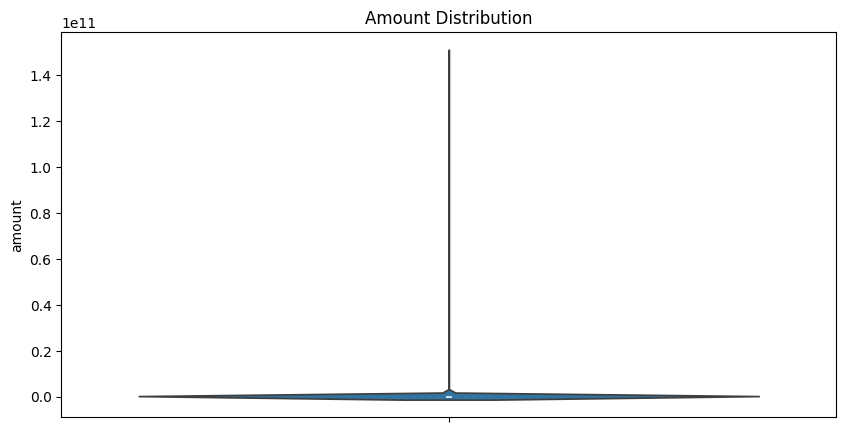

In [88]:
# Set the size of the figure
plt.figure(figsize = (10, 5))
# Create a violin plot for the "amount" column 
sns.violinplot(df_combined["amount"])
# Add a title to the plot
plt.title("Amount Distribution")
# Display the plot
plt.show()

The plot indicates that while a few startups receive substantial funding, most startups receive much smaller amounts.
This could reflect an investment strategy where investors are willing to place large bets on a few promising startups.

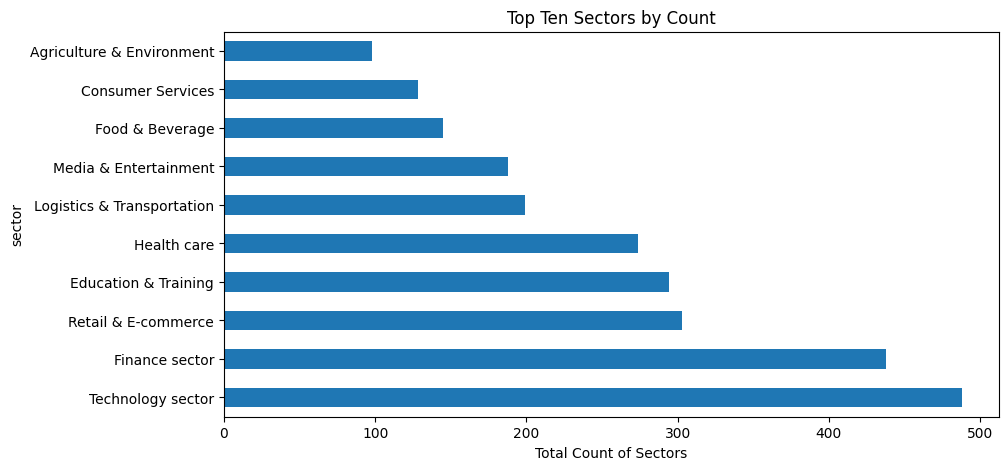

In [70]:
# Set the size of the figure
plt.figure(figsize = (10,5))
# Create a horizontal bar plot for the top 10 sectors by count
df_combined["sector"].value_counts(ascending = False)[:10].plot(kind = "barh")
# Add title to plot
plt.title("Top Ten Sectors by Count")
# Lanel x-axis
plt.xlabel("Total Count of Sectors")
# Display plot
plt.show()

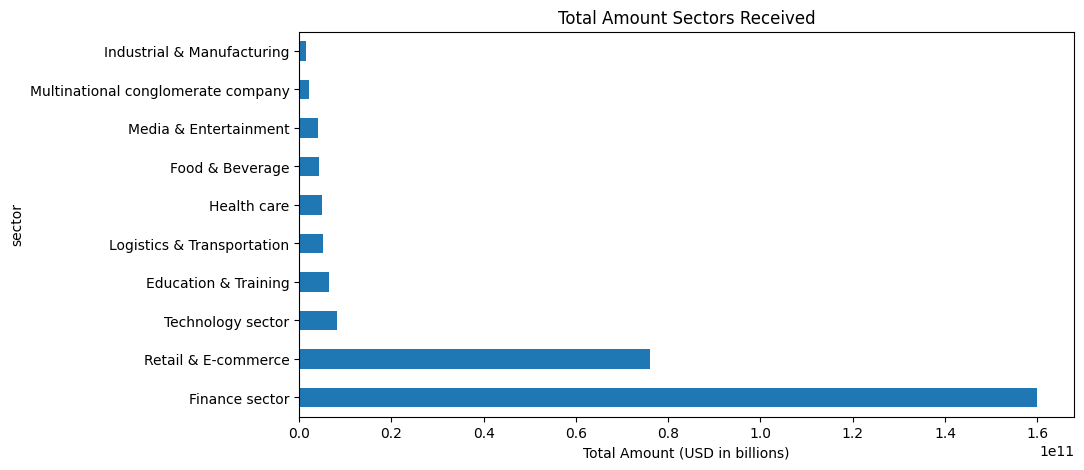

In [87]:
# Set figure size
plt.figure(figsize = (10,5))
# # Create a horizontal bar plot for the top 10 sectors by total amount received
df_combined.groupby(by = "sector")["amount"].sum().sort_values(ascending = False)[:10].plot(kind = "barh")
# Add title to plot
plt.title("Total Amount Sectors Received")
# Label x-axis
plt.xlabel("Total Amount (USD in billions)")
# Display plot
plt.show()

1. Finance sector: Despite having only 438 counts (2nd highest), the Finance sector received the highest total funding ($159.99 billion),
indicating a significant average funding per project/company.
2. Technology sector: The Technology sector has the highest count (488) but received relatively less funding ($8.14 billion)
compared to Finance and Retail & E-commerce, suggesting a lower average funding per project/company.
3. Retail & E-commerce: With the second-highest funding ($76.16 billion) and a significant count (303),
Retail & E-commerce appears to be a rapidly growing sector.
4. Education & Training and Logistics & Transportation: These sectors have a consistent performance, with a moderate count (294 and 199, respectively)
and moderate funding ($6.47 billion and $5.27 billion, respectively
5. Healthcare and Food & Beverage: These sectors have a stable presence, with a moderate count (274 and 145, respectively)
and moderate funding ($5.04 billion and 4.32 billion, respectively
6. Media & Entertainment and Industrial & Manufacturing: These sectors have a relatively lower count (188 and 145, respectively)
but still received significant funding ($4.04 billion and $1.53 billion, respectively), indicating a niche presence.
7. Multinational conglomerate company: With only a count of 1, this sector received a significant funding ($2.2 billion),
highlighting the influence of large conglomerates.

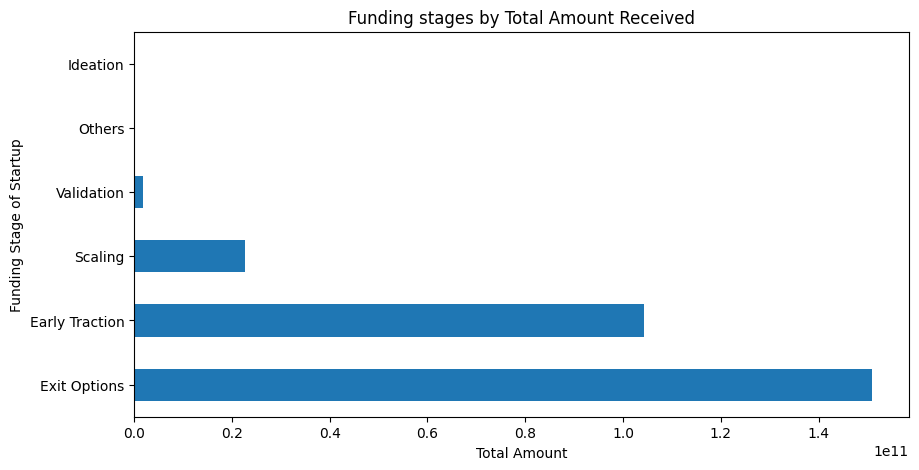

In [89]:
# Set figure size
plt.figure(figsize = (10, 5))
# Create horizontal bar chart of stages by total amount received
df_combined.groupby(by = ["stage"])["amount"].sum().sort_values(ascending = False).plot(kind = "barh")
# Add title to plot
plt.title("Funding stages by Total Amount Received")
# Label x-axis
plt.xlabel("Total Amount")
# Label y-axis
plt.ylabel("Funding Stage of Startup")
# Display plot
plt.show()

Most startups are in the Early Traction (1562) and Validation (743) stages,
suggesting that many startups are in the process of proving their concepts and gaining initial traction.

The Exit Options stage has the highest total funding ($150.93 billion),
indicating significant investments and returns at the point where startups are either going public or being acquired.
This is expected since these startups have matured and are exiting.

# Analytical Question

1. #### How have funding trends evolved over the years?
a) Funding trend over ther years


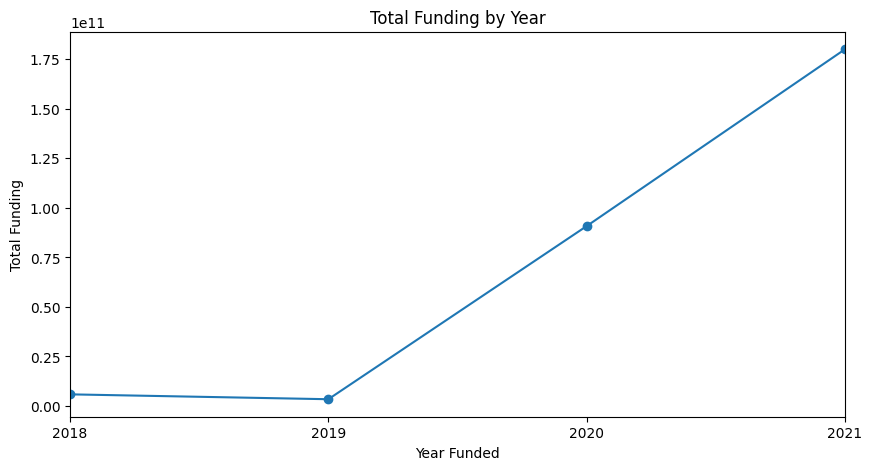

In [73]:
# Set figure size
plt.figure(figsize = (10, 5))

(
    df_combined
    # Set year funded as index for the analysis
    .set_index("year_funded")
    # Sort index in ascending order
    .sort_index(ascending = True)
    # Resample by year
    .resample("YE")
    # Select amount column
    ["amount"]
    # Apply aggregation to selected column
    .sum()
    # Visualise as line chart
    .plot(title = "Total Funding by Year", xlabel = "Year Funded", ylabel = "Total Funding", marker = "o")
    
)

plt.show()

**Observation**:

- The total funding starts at a relatively low level in 2018 and slight decrease in 2019, indicating either fewer investments or smaller amounts being invested compared to 2018 which could be associated with external factors
- The total funding starts to rise noticeably in 2020, suggesting increased investor confidence or more significant funding rounds.<br>
- Total Funding increased linearly and peaked in 2021, indicating a substantial influx of capital into startups.<br>
This trend suggests growing investor interest and confidence in the startup ecosystem, particularly in the last two years.

b) Funding evolution across funding stages over the years

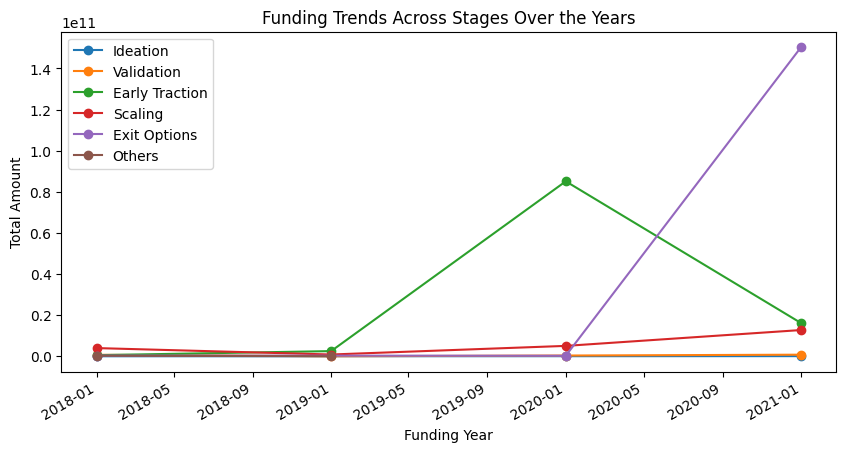

In [74]:
# Filter data for each stage
ideation = df_combined[df_combined["stage"] == "Ideation"]
validation = df_combined[df_combined["stage"] == "Validation"]
early_traction = df_combined[df_combined["stage"] == "Early Traction"]
scaling = df_combined[df_combined["stage"] == "Scaling"]
exit_options = df_combined[df_combined["stage"] == "Exit Options"]
others = df_combined[df_combined["stage"] == "Others"]

# Group by year and sum the funding amounts
ideation_grouped = ideation.groupby(by = "year_funded")["amount"].sum()
validation_grouped = validation.groupby(by = "year_funded")["amount"].sum()
early_traction_grouped = early_traction.groupby(by = "year_funded")["amount"].sum()
scaling_grouped = scaling.groupby(by = "year_funded")["amount"].sum()
exit_options_grouped = exit_options.groupby(by = "year_funded")["amount"].sum()
others_grouped = others.groupby(by = "year_funded")["amount"].sum()

plt.figure(figsize = (10, 5))

ideation_grouped.plot(label = "Ideation", marker = "o")
validation_grouped.plot(label = "Validation", marker = "o")
early_traction_grouped.plot(label = "Early Traction", marker = "o")
scaling_grouped.plot(label = "Scaling", marker = "o")
exit_options_grouped.plot(label = "Exit Options", marker = "o")
others_grouped.plot(label = "Others", marker = "o")

plt.title("Funding Trends Across Stages Over the Years")
plt.xlabel("Funding Year")
plt.ylabel("Total Amount")
plt.legend()
plt.show()

**Observations**:

- There is a visible trend where substantial funding tends to occur in later stages ("Scaling" and "Exit Options") rather than early stages ("Ideation," "Validation," and "Early Traction").
- This trend indicates that investors might be more willing to invest larger amounts as ventures progress towards later stages of development and potential exit scenarios

c) Funding evoluton across top 5 sectors over the years?

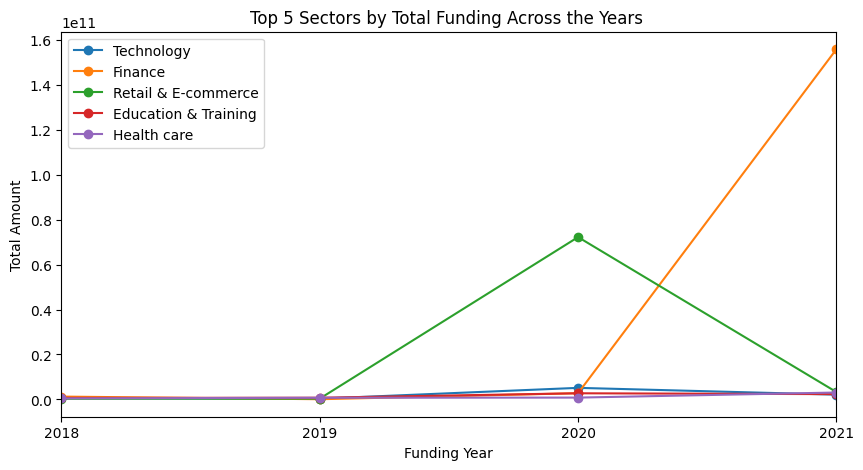

In [75]:
# Filter data for each sector
tech = df_combined[df_combined["sector"] == "Technology sector"]
finance = df_combined[df_combined["sector"] == "Finance sector"]
retail = df_combined[df_combined["sector"] == "Retail & E-commerce"]
education = df_combined[df_combined["sector"] == "Education & Training"]
health = df_combined[df_combined["sector"] == "Health care"]

# Group by year and sum the funding amounts
tech_grouped = tech.groupby(tech['year_funded'])['amount'].sum()
finance_grouped = finance.groupby(finance['year_funded'])['amount'].sum()
retail_grouped = retail.groupby(retail['year_funded'])['amount'].sum()
education_grouped = education.groupby(education['year_funded'])['amount'].sum()
health_grouped = health.groupby(health['year_funded'])['amount'].sum()

# Set figure size
plt.figure(figsize = (10, 5))

tech_grouped.plot(label = "Technology", marker = "o")
finance_grouped.plot(label = "Finance", marker = "o")
retail_grouped.plot(label = "Retail & E-commerce", marker = "o")
education_grouped.plot(label = "Education & Training", marker = "o")
health_grouped.plot(label = "Health care", marker = "o")

plt.title("Top 5 Sectors by Total Funding Across the Years ")
plt.xlabel("Funding Year")
plt.ylabel("Total Amount")
plt.legend()
plt.show()

**Observations**:

- Finance had a massive surge in funding in 2021, dwarfing the funding amounts for the other sectors.
- The retail & e-commerce sector had a significant spike in 2020, possibly due to the pandemic's impact, but then dropped in 2021.
- The technology, education & training, and health care sectors have remained relatively stable and low in comparison.

### 2. Is there a correlation between the year a startup received funding and the amount of funding it received?

Plot the amount of funding against the year it was received. Calculate the correlation coefficient to quantify the relationship.<br>
Trend Analysis: Identify trends or patterns in the data.<br>


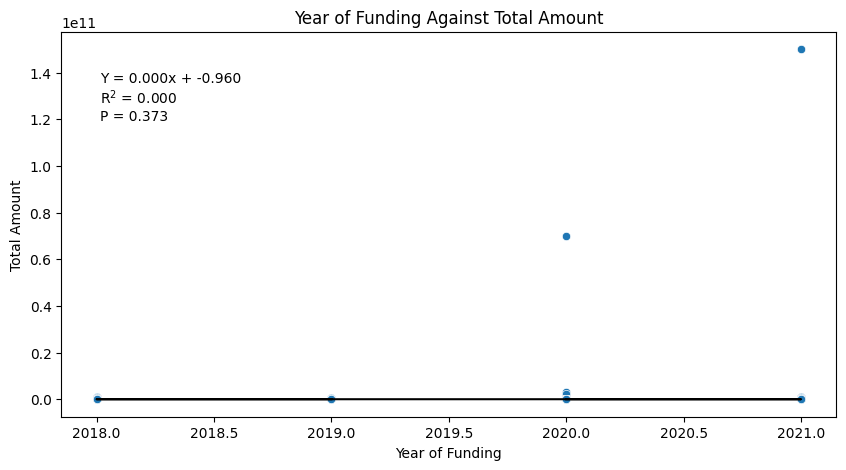

In [76]:
slope, intercept, rvalue, pvalue, stderr = stats.linregress(df_combined["year_funded"].dt.year, df_combined["amount"]/1e11)

plt.figure(figsize = (10, 5))

sns.scatterplot(x = df_combined["year_funded"].dt.year, y = df_combined["amount"])
plt.plot(df_combined["year_funded"].dt.year, (slope*df_combined["year_funded"].dt.year)+intercept, color = "black")
plt.annotate("Y = %.3fx + %.3f\nR$^2$ = %.3f\nP = %.3f"%(slope, intercept, rvalue**2, pvalue),
             xy = (0.1, 0.7),
             xycoords = "figure fraction")
plt.title("Year of Funding Against Total Amount")
plt.xlabel("Year of Funding")
plt.ylabel("Total Amount")
plt.show()

**Observation**:
- The plot indicates that there is no significant relationship between the year of funding<br> and the total amount of funding based on the linear regression model.

- P value of 0.37 indicates that the year a startup received funding has no significant influence on the funding amount it received,<br>
taking a significant value of 0.05

- The significant increases in funding in 2020 and 2021 are likely due to specific external factors rather than a consistent trend over the years.

### 3. How does funding vary across the locations of startups' headquarters

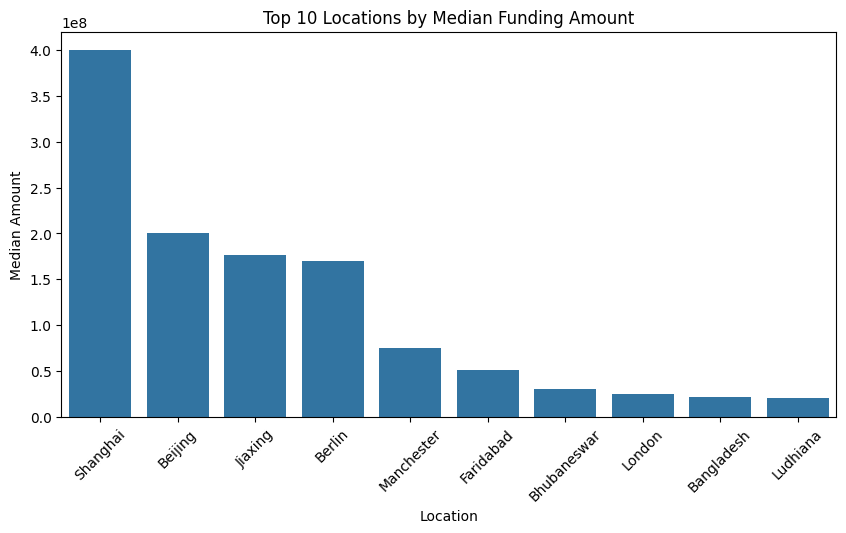

In [86]:
plot = df_combined.groupby(by = "headquarter")["amount"].median().sort_values(ascending = False)[:10]
df_plot = pd.DataFrame(plot)
df_plot.reset_index(inplace = True)

# Set figure size
plt.figure(figsize = (10, 5))
# Plot barplot
sns.barplot(data = df_plot, x = "headquarter", y = "amount")
plt.xticks(rotation=45)
plt.title("Top 10 Locations by Median Funding Amount")
plt.xlabel("Location")
plt.ylabel("Median Amount")
plt.show()

**Observation**:

These observations indicate a high concentration of funding in a few major cities, particularly in Asia, with Shanghai leading by a large margin.

### 4. Which sectors can be considered the most attractive?

a) Determine the top 10 sectors by total funding received


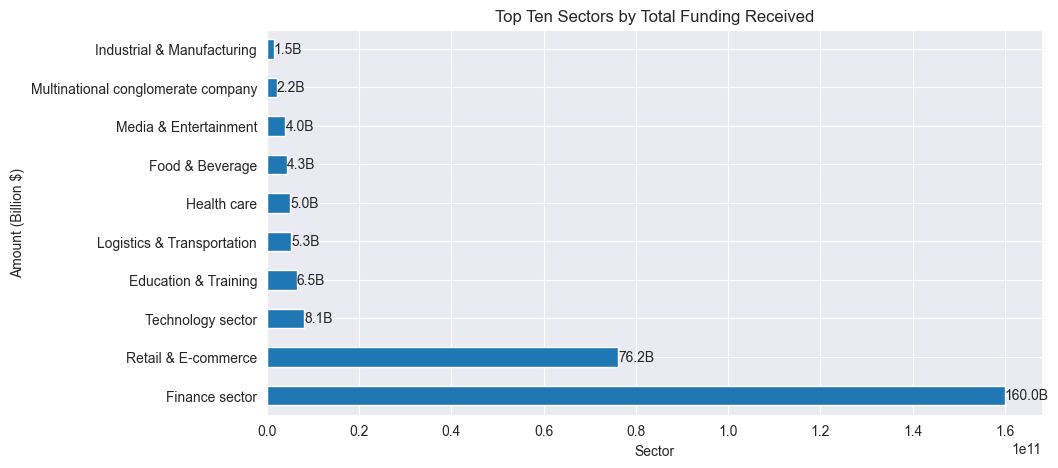

In [102]:
top_ten_sectors = df_combined.groupby("sector")["amount"].sum().sort_values(ascending = False)[:10]

# Set style
sns.set_style("darkgrid")

# Plot barchart
fig, ax = plt.subplots(figsize=(10, 5))
top_ten_sectors.plot(kind = "barh", ax = ax)
plt.title("Top Ten Sectors by Total Funding Received")
plt.xlabel("Sector")
plt.ylabel("Amount (Billion $)")

# Annotate the bars
for i, (sector, amount) in enumerate(top_ten_sectors.items()):
    ax.annotate(f"{amount / 1e9:.1f}M", xy=(amount, i), ha='left', va='center', fontsize=10)

plt.show()

**Observation**:

These observations indicate that the Finance sector attracts the most funding, followed by Retail & E-commerce,<br>with a significant drop in funding amounts for the other sectors. This highlights the dominance of these two sectors in attracting investment.


b) Median funding per sector

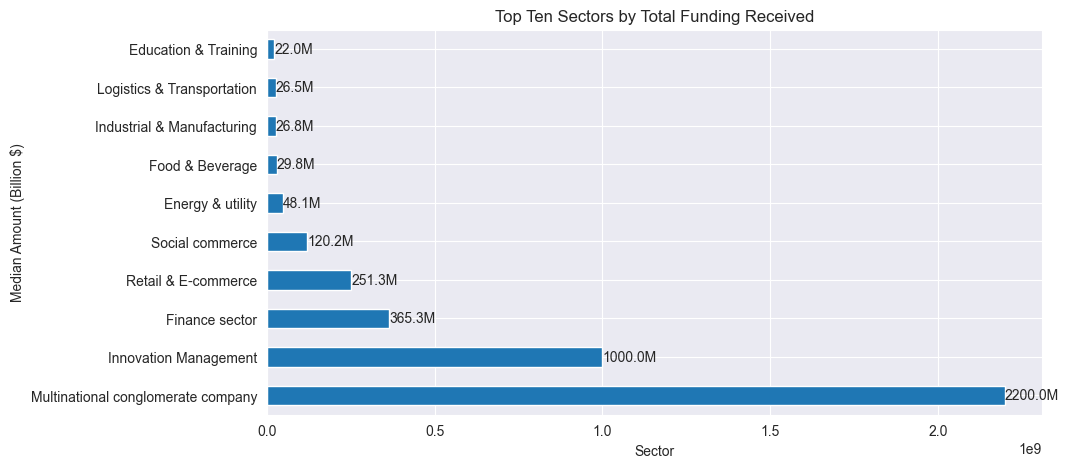

In [109]:
top_ten_sectors = df_combined.groupby("sector")["amount"].mean().sort_values(ascending = False)[:10]

# Set style
sns.set_style("darkgrid")

# Plot barchart
fig, ax = plt.subplots(figsize=(10, 5))
top_ten_sectors.plot(kind = "barh", ax = ax)
plt.title("Top Ten Sectors by Total Funding Received")
plt.xlabel("Sector")
plt.ylabel("Median Amount (Billion $)")

# Annotate the bars
for i, (sector, amount) in enumerate(top_ten_sectors.items()):
    ax.annotate(f"{amount / 1e6:.1f}M", xy=(amount, i), ha='left', va='center', fontsize=10)

plt.show()

### 5. Is there a relationship between funding stage and the amount of funding?

a) Determine total funding per funding stage? 

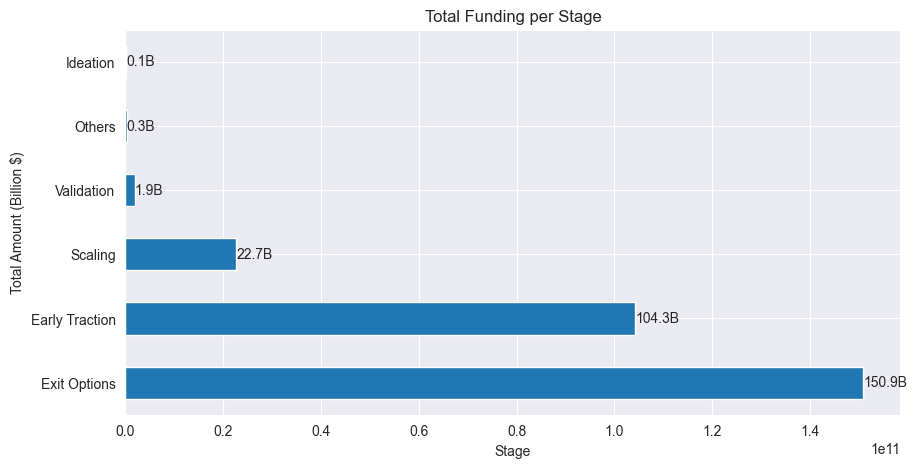

In [111]:
funding_stage = df_combined.groupby("stage")["amount"].sum().sort_values(ascending = False)[:10]

# Set style
sns.set_style("darkgrid")

# Plot barchart
fig, ax = plt.subplots(figsize=(10, 5))
funding_stage.plot(kind = "barh", ax = ax)
plt.title("Total Funding per Stage")
plt.xlabel("Stage")
plt.ylabel("Total Amount (Billion $)")

# Annotate the bars
for i, (stage, amount) in enumerate(funding_stage.items()):
    ax.annotate(f"{amount / 1e9:.1f}B", xy=(amount, i), ha='left', va='center', fontsize=10)

plt.show()

**Observation**:

Most startups are in the Early Traction (1562) and Validation (743) stages,
suggesting that many startups are in the process of proving their concepts and gaining initial traction.

The Exit Options stage has the highest total funding ($150.93 billion),
indicating significant investments and returns at the point where startups are either going public or being acquired.
This is expected since these startups have matured and are exiting.

b) Determine median funding per stage

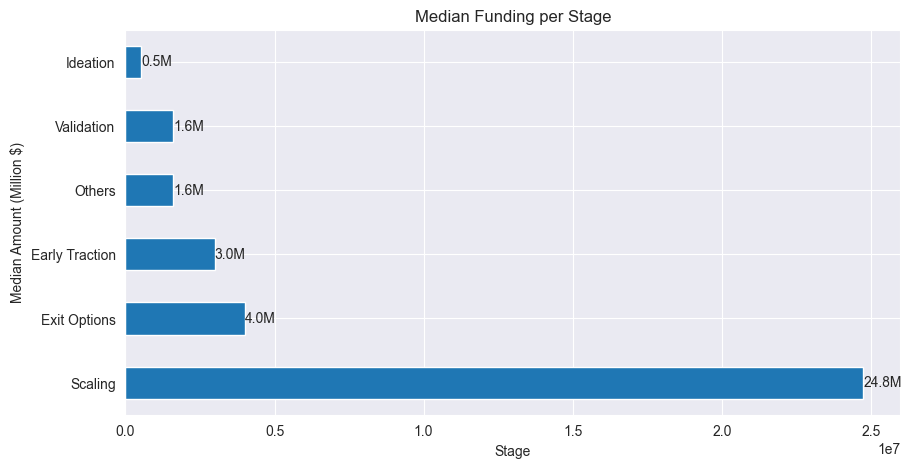

In [113]:
funding_stage = df_combined.groupby("stage")["amount"].median().sort_values(ascending = False)[:10]

# Set style
sns.set_style("darkgrid")

# Plot barchart
fig, ax = plt.subplots(figsize=(10, 5))
funding_stage.plot(kind = "barh", ax = ax)
plt.title("Median Funding per Stage")
plt.xlabel("Stage")
plt.ylabel("Median Amount (Million $)")

# Annotate the bars
for i, (stage, amount) in enumerate(funding_stage.items()):
    ax.annotate(f"{amount / 1e6:.1f}M", xy=(amount, i), ha='left', va='center', fontsize=10)

plt.show()

**Conclusion**:

From the hypothesis testing, it was concluded with 95% confidence that funding stage has significant influence on the funding startups receive.<br>
Also, It could be infered from the plots that startups that are more muture get more funding on average

Observations
Top Industries and Locations:

Top industries exhibit a concentration in the leading locations. Therefore, Location of a company does influences its sector
Sectors Concentration:

consistent pattern reveals a correlation between a sector's dominance and its prevalent location.
This consistency suggests a nuanced influence of geography on flourishing industries.
Outliers Analysis:

Instances of outliers are notable, such as in Bangalore where Fintech and Education Tech industries concentrate more.
Conclusion:

The data strongly supports the notion that top industries tend to concentrate in the leading locations.
Summary and Recommendations
Summary
Funding Trends

Funding experienced a modest decline from 2018 to 2019, followed by a remarkable increase of over $176 billion from 2019 to 2021.
2021 stands out as the best-funded year, surpassing $179 billion.
Geographical Dynamics

Mumbai is the most well-funded location, with other cities trailing at a considerable distance.
Notable variations across cities, with Mumbai, Shanghai, San Francisco, Kalpakkan, and Beijing leading.
Sector-Specific Insights

Retail and fintech sectors attract the most funding, with 'Others' (Private Equity, Corporate Round, Debt) showing substantial growth.
Key Players

Silver Lake and Mubadala Investment Company lead all investors, contributing a massive $70 billion.
Recommendations
Location Consideration:

Investors should focus on top-funded locations like Mumbai, Shanghai, San Francisco, Kalpakkan, and Beijing.
Sector-Specific Investments:

Explore opportunities in fintech and retail, the most attractive sectors for investors.
Emerging Trends:

Monitor trends in mature startups in the 'Others' category, signaling investor comfort with later-stage ventures.
Diversification:

Diversify portfolios across locations and sectors for a balanced risk-return profile.